### Black Friday Dataset EDA And Feature Enaineering
### Cleaning and preparing the data for model Training

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/train.csv')

In [ ]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
df_test = pd.read_csv('/content/test.csv')

In [ ]:
## apend is not working
##df = df_train.append(df_test)

In [ ]:
#The error message “‘DataFrame’ object has no attribute ‘append’” occurs
# because the append() method was deprecated in pandas 2.0.
# Instead, you should use the concat() function to append data frames.
df = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Drop the unwanted columns

In [ ]:
df.drop(['User_ID'], axis =1, inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Convert the categorical into numerical ###

In [ ]:
## Converting the gender to the numerical variable
# first is to create the dummy dataset for the gender and then assigning it to the dataset
#df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)
# The next is to directly map to the gendeer column
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

For Age column

In [ ]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

Label encoding can also be performed for this task
##second technqiue
from sklearn import preprocessing

### label_encoder object knows how to understand word labels. ###
label_encoder = preprocessing.LabelEncoder()

### Encode labels in column 'Age'. ###
df['Age']= label_encoder.fit_transform(df['Age'])

df['Age'].unique()

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
##fixing categorical City_category
## As like earlier we discussed we are creating the dummies
# and adding it to the dataset
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
# as the previous code is resulting in the true and false added the dtype as INT.
df_city=pd.get_dummies(df['City_Category'],drop_first=True, dtype=int)

In [ ]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
df=pd.concat([df,df_city],axis=1)
df = df.drop('City_Category', axis =1)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
## Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [ ]:
# For the categorical variables and discrete variables
# the Mode is used to relpace the misssing values.
df['Product_Category_2'].mode()[0]
#here the indexing is used to get the mode alone in the result.

8.0

In [ ]:
## Replace the missing values with mode using the fillna
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df['Product_Category_2'].isnull().sum()

0

In [ ]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [ ]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 71.7+ MB


In [ ]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

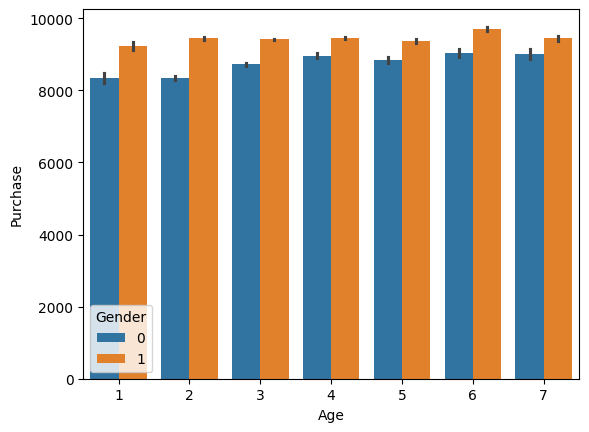

In [ ]:
##Visualisation Age vs Purchased
sns.barplot(x = 'Age',y = 'Purchase',hue='Gender',data=df)

## Purchasing of men is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

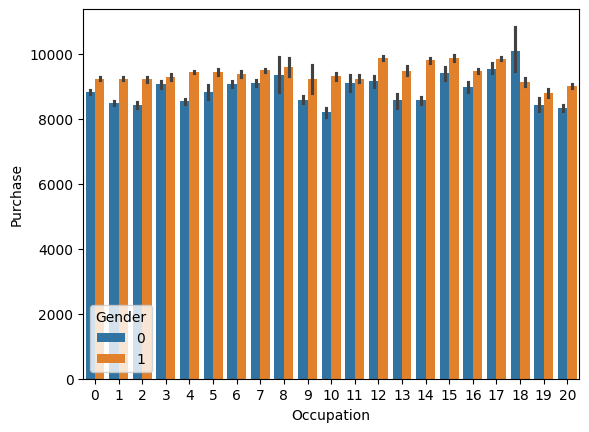

In [ ]:
## Visualization of Purchase with occupation
sns.barplot(x = 'Occupation',y = 'Purchase',hue='Gender',data=df)

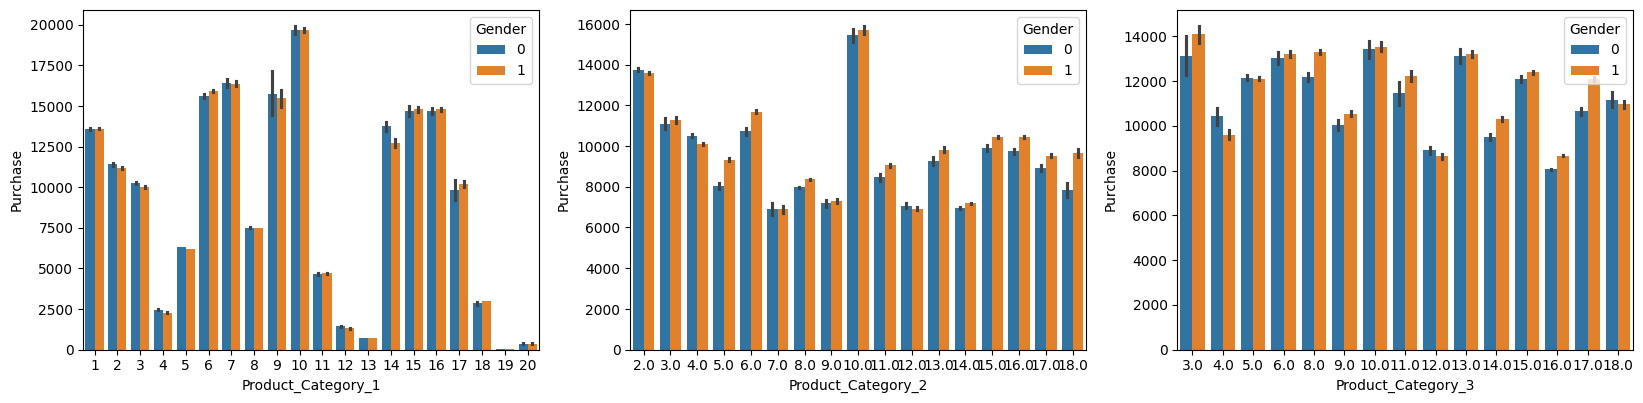

In [ ]:
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.barplot(x = 'Product_Category_1',y = 'Purchase',hue='Gender',data=df)

plt.subplot(3,3,2)
sns.barplot(x = 'Product_Category_2',y = 'Purchase',hue='Gender',data=df)

plt.subplot(3,3,3)
sns.barplot(x = 'Product_Category_3',y = 'Purchase',hue='Gender',data=df)
plt.savefig('product-wise purchasing.jpg')

In [ ]:
#sns.pairplot(df, hue = 'Product_ID', diag_kind = 'kde')
#plt.savefig('pairplot.jpg')

In [ ]:
##Feature Scaling
# test data is taken where the purchase is null as we compbined before
# train is taken with purchase which are not Nan
df_test=df[df['Purchase'].isnull()]

In [ ]:
df_test.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
550069,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
550070,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
550071,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
550072,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [ ]:
df_train=df[~df['Purchase'].isnull()] # ~ not having
df_train.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
X=df_train.drop(['Purchase', 'Product_ID'],axis=1)
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [ ]:
X.shape

(550068, 10)

In [ ]:
y=df_train['Purchase']

In [ ]:
y.shape

(550068,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,1,2,14,3,0,1,2.0,16.0,1,0
433826,1,6,0,0,1,8,16.0,16.0,0,0
516298,1,4,17,0,0,3,4.0,12.0,0,1
193380,1,3,4,1,0,8,16.0,16.0,1,0
273542,0,4,20,3,1,3,4.0,12.0,1,0


In [ ]:
## feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)*100, lr.score(X_test,y_test)*100

(13.210555628187514, 12.948768560712399)

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)*100, dt.score(X_test,y_test)*100

(79.83631647792538, 55.82640534204286)

In [ ]:
#lr3 = Lasso()
#lr3.fit(X_train, y_train)
#lr3.score(X_train, y_train)*100, lr3.score(X_test,y_test)*100

In [ ]:
lr4 = Ridge()
lr4.fit(X_train, y_train)
lr4.score(X_train, y_train)*100, lr4.score(X_test,y_test)*100

(13.210555628099762, 12.948769558874373)

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_train, y_train)*100, rfr.score(X_test,y_test)*100

(78.75051863025938, 62.922348370441014)

In [ ]:
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr.score(X_train, y_train)*100, knr.score(X_test,y_test)*100

(64.73951731332154, 50.659057532616615)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(y_test,rfr.predict(X_test)))

0.6292234837044102


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor()

In [ ]:
gbr.fit(X_train, y_train)
print(r2_score(y_test, gbr.predict(X_test)))

0.6444959838731033


In [ ]:
gbr.score(X_train, y_train)*100, gbr.score(X_test,y_test)*100

(64.96087814238759, 64.44959838731033)

In [ ]:
from xgboost import XGBRegressor, XGBRFRegressor
xgb = XGBRegressor()
xgbr = XGBRFRegressor()

In [ ]:
xgb.fit(X_train, y_train)
print(r2_score(y_test, xgb.predict(X_test)))

xgbr.fit(X_train, y_train)
print(r2_score(y_test, xgbr.predict(X_test)))


0.6668955124144831
0.5845697344685554


In [ ]:
xgb.score(X_train, y_train)*100, xgb.score(X_test,y_test)*100

(67.99197211448806, 66.68955124144831)

In [ ]:
xgbr.score(X_train, y_train)*100, xgbr.score(X_test,y_test)*100

(58.9592269938375, 58.45697344685554)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
models = {
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Define hyperparameter ranges for each model
param_grid = {
    "K-Neighbors Regressor": {"n_neighbors": [3, 5, 7],},
    "Random Forest Regressor": {'n_estimators': [8,16,32,64,128,256], "max_depth": [3, 5, 7]},
    "XGBRegressor": {'depth': [6,8,10],'learning_rate': [0.01, 0.05, 0.1],'iterations': [30, 50, 100]},
    "AdaBoost Regressor": {'learning_rate':[.1,.01,0.5,.001],'n_estimators': [8,16,32,64,128,256]}
}

model_list = []
r2_list =[]

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        model,
        param_grid[model_name],
        scoring=scorer,
        cv=5,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train) # Make predictions

    y_train_pred = grid_search.predict(X_train)

    y_test_pred = grid_search.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)

    model_list.append(model_name)

    print('Best hyperparameters:', grid_search.best_params_)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')


K-Neighbors Regressor
Best hyperparameters: {'n_neighbors': 5}
Model performance for Training set
- Root Mean Squared Error: 2983.5495
- Mean Squared Error: 8901567.7598
- Mean Absolute Error: 2192.1820
- R2 Score: 0.6474
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3526.3571
- Mean Squared Error: 3526.3571
- Mean Absolute Error: 2564.8292
- R2 Score: 0.5066


Random Forest Regressor
Best hyperparameters: {'max_depth': 7, 'n_estimators': 128}
Model performance for Training set
- Root Mean Squared Error: 2964.1804
- Mean Squared Error: 8786365.4030
- Mean Absolute Error: 2236.1604
- R2 Score: 0.6520
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2987.6687
- Mean Squared Error: 2987.6687
- Mean Absolute Error: 2251.5360
- R2 Score: 0.6458




/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:26:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "depth", "iterations" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor
Best hyperparameters: {'depth': 6, 'iterations': 30, 'learning_rate': 0.1}
Model performance for Training set
- Root Mean Squared Error: 2895.8257
- Mean Squared Error: 8385806.4002
- Mean Absolute Error: 2178.0139
- R2 Score: 0.6678
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2928.4398
- Mean Squared Error: 2928.4398
- Mean Absolute Error: 2199.5659
- R2 Score: 0.6597


